In [102]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import sys

parent_dir = str(Path().resolve().parents[0])
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from src.utils.solvers import SoftBregman, LogStabilised_SoftBregman

In [103]:
n = 200
m = 500

np.random.seed(5)

num_blocked_pairs = n+m
source_enforcement = 1.0
target_enforcement = 0.25

gamma = 1e-2
gamma_r = 1
gamma_c = np.clip(np.random.random(size=m), 0.05, 0.95)

num_iters = int(5e4)

colors = np.array(['blue', 'red', 'grey'])

In [104]:
mu = np.random.normal(loc=12.5, scale=2.0, size=n)
nu = np.random.normal(loc=5.0, scale=1.0, size=m)

In [105]:
# relaxation of constraints
rows_to_relax = (np.random.random(n) >= source_enforcement).reshape(-1,1)
cols_to_relax = (np.random.random(m) >= target_enforcement).reshape(1,-1)

# additional constraints in the transport plan
l_idxs_x = np.random.choice(np.arange(n), num_blocked_pairs)
l_idxs_y = np.random.choice(np.arange(m), num_blocked_pairs)
blocked_idxs = np.c_[l_idxs_x, l_idxs_y]

# cost function
flexibility_cost = gamma_c
C = np.random.random(size=(n,m))

200 (200,) (200, 1)
500 (500,) (1, 500)


  2%|▏         | 751/50000 [00:00<00:11, 4160.98it/s]


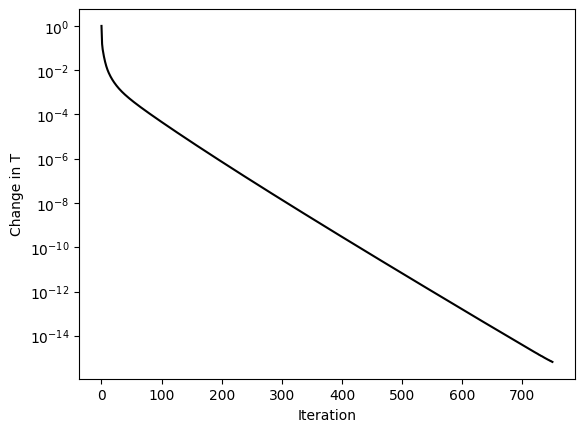

In [106]:
print(n, mu.shape, rows_to_relax.shape)
print(m, nu.shape, cols_to_relax.shape)

solver = SoftBregman(gamma, gamma_c, gamma_r, rows_to_relax, cols_to_relax, blocked_idxs)
T = solver.solve(np.ones(n, dtype=np.float32), np.ones(m, dtype=np.float32),
                 mu, nu,
                 plot=True,
                 num_iters=num_iters, thresh=1e-12,
                 C=C)

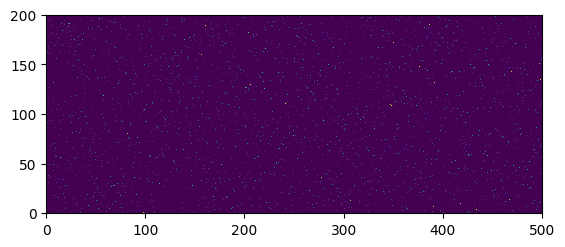

In [107]:
plt.pcolormesh(T)
plt.gca().set_aspect('equal')

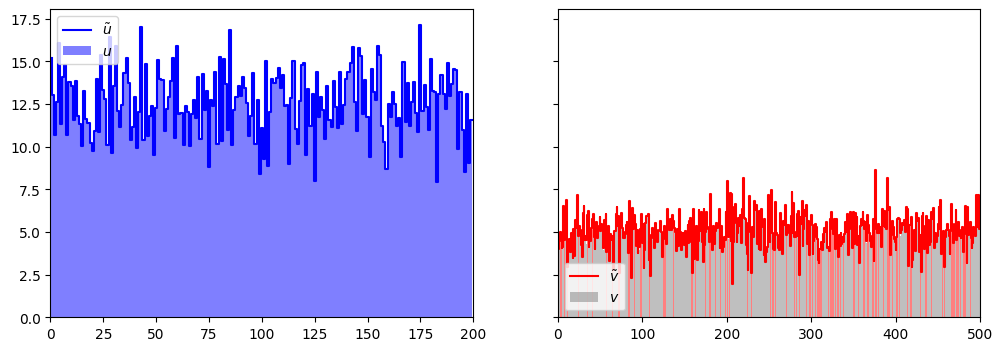

In [108]:
fig, axs = plt.subplots(1,2, figsize=(12,4), sharey='row')

axs[0].step(x=np.arange(n)+0.5, y=mu, color=colors[0], alpha=1, label=r'$\tilde{u}$')
axs[0].bar(x=range(n), height=np.sum(T, axis=1), width=1, color=colors[rows_to_relax.reshape(-1).astype(int)], alpha=0.5, label=r'$u$')

axs[1].step(x=np.arange(m)+0.5, y=nu, color=colors[1], alpha=1, label=r'$\tilde{v}$')
axs[1].bar(x=range(m), height=np.sum(T, axis=0), width=1, color=colors[cols_to_relax.reshape(-1).astype(int) + 1], alpha=0.5, label=r'$v$')

axs[0].set_xlim(0, n)
axs[1].set_xlim(0, m)

axs[0].legend(loc='upper left')
axs[1].legend(loc='lower left')

Text(0, 0.5, 'Realised Flexibility, $\\left| \\sum_i t_{ij} - \\nu_j \\right|$')

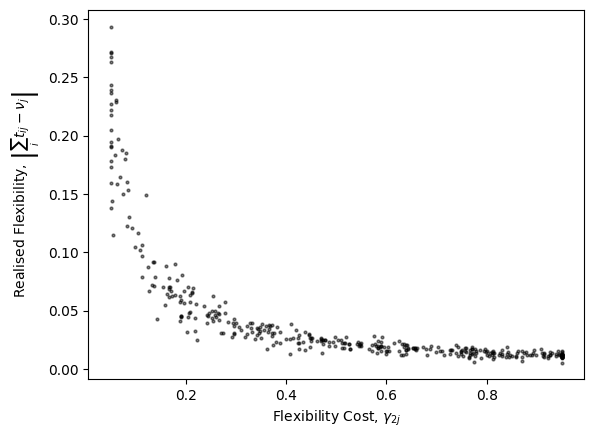

In [109]:
fig, axs = plt.subplots(1, 1, sharey='all', squeeze=False)

# axs[0][0].scatter(np.arange(n), np.abs(np.sum(T, axis=1) - mu) / mu, c=colors[0], s=4)

# axs[0][-1].scatter(gamma_c, np.abs(np.sum(T, axis=0) - nu), c=colors[cols_to_relax.reshape(-1).astype(int) + 1], s=4)
axs[0][-1].scatter(gamma_c[cols_to_relax.reshape(-1)], np.abs(np.sum(T, axis=0) - nu)[cols_to_relax.reshape(-1)], c='k', s=4, alpha=0.5)
axs[0][-1].set_xlabel(r'Flexibility Cost, $\gamma_{2j}$')
axs[0][-1].set_ylabel('Realised Flexibility, '+r'$\left| \sum_i t_{ij} - \nu_j \right|$')

In [110]:
solver.col_exponent_0

array([[0.18166482, 0.46544998, 0.17130677, 1.        , 1.        ,
        1.        , 0.43371904, 0.34141981, 1.        , 0.15805159,
        0.07470916, 1.        , 1.        , 0.13667316, 0.46806729,
        0.21512391, 0.29290395, 0.22844265, 0.38604652, 0.36702363,
        0.37497234, 0.20999771, 0.2215996 , 0.20228988, 0.24674062,
        1.        , 0.14208222, 0.48717949, 0.48717949, 0.15854286,
        0.04761905, 0.16981828, 0.41171059, 0.438049  , 0.04761905,
        1.        , 0.04761905, 1.        , 0.39016774, 0.48717949,
        0.20578039, 1.        , 0.46537875, 0.47991148, 0.04761905,
        0.31949104, 0.48717949, 0.28517551, 0.44865077, 0.35336041,
        0.43530074, 0.32656807, 0.04761905, 0.0796352 , 0.1002775 ,
        0.20079608, 0.48717949, 0.38716705, 1.        , 0.36146383,
        0.38851243, 0.44809389, 0.48097315, 0.47715884, 0.45199796,
        1.        , 0.26527228, 0.04761905, 0.35331936, 0.44325137,
        0.04865448, 0.15872201, 1.        , 1.  

In [111]:
np.sum(nu)

np.float64(2527.6090567324845)